**Name: Panthil Patel   Class:MLAI-6B Batch: B   ERP NO.: 23SE02ML134  Assignmnet 2 (Decision Tree)**

In [5]:
import numpy as np

x = np.array([2,3])
y = np.array([5,7])

#Euclidean Distance
euclidean = np.linalg.norm(x-y)
print("Euclidean:",euclidean)

#Manhattan Distance
manhattan = np.sum(np.abs(x-y))
print("Manhattan:",manhattan)

#Cosine Distance
cosine = 1 - np.dot(x,y) / (np.linalg.norm(x) * np.linalg.norm(y))
print("Cosine:",cosine)

Euclidean: 5.0
Manhattan: 7
Cosine: 0.0005198856603003676


In [10]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#Load dataset
df = pd.read_csv("play_tennis.csv")

#Encode categorical values
le = LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col])

#Split dataset
X = df.drop("PlayTennis",axis=1)
y = df["PlayTennis"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

#Euclidean Distance
knn_euclidean = KNeighborsClassifier(n_neighbors=3,metric="euclidean")
knn_euclidean.fit(X_train,y_train)
y_pred_euclidean = knn_euclidean.predict(X_test)
print("Euclidean Accuracy:",accuracy_score(y_test,knn_euclidean.predict(X_test)))

#Manhattan Distance
knn_manhattan = KNeighborsClassifier(n_neighbors=3,metric="manhattan")
knn_manhattan.fit(X_train,y_train)
y_pred_manhattan = knn_manhattan.predict(X_test)
print("Manhattan Accuracy:",accuracy_score(y_test,knn_manhattan.predict(X_test)))

Euclidean Accuracy: 0.4
Manhattan Accuracy: 0.6


In [12]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2,random_state=42)
kmeans.fit(X_train,y_train)

print("Cluster Centers:",kmeans.cluster_centers_)
print("Cluster Labels:",kmeans.labels_)

Cluster Centers: [[1.25 1.75 0.   0.25]
 [0.8  0.2  1.   0.6 ]]
Cluster Labels: [1 1 1 0 0 1 0 1 0]


In [13]:
from scipy.spatial.distance import hamming, jaccard
a = np.array([1,0,1,1,0])
b = np.array([1,1,0,1,0])

print("Hamming Distance:",hamming(a,b))
print("Jaccard Distance:",jaccard(a,b))

Hamming Distance: 0.4
Jaccard Distance: 0.5


In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X = df.drop("PlayTennis", axis=1)
y = df["PlayTennis"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

print("Accuracy:",dt.score(X_test,y_test))

Accuracy: 0.6


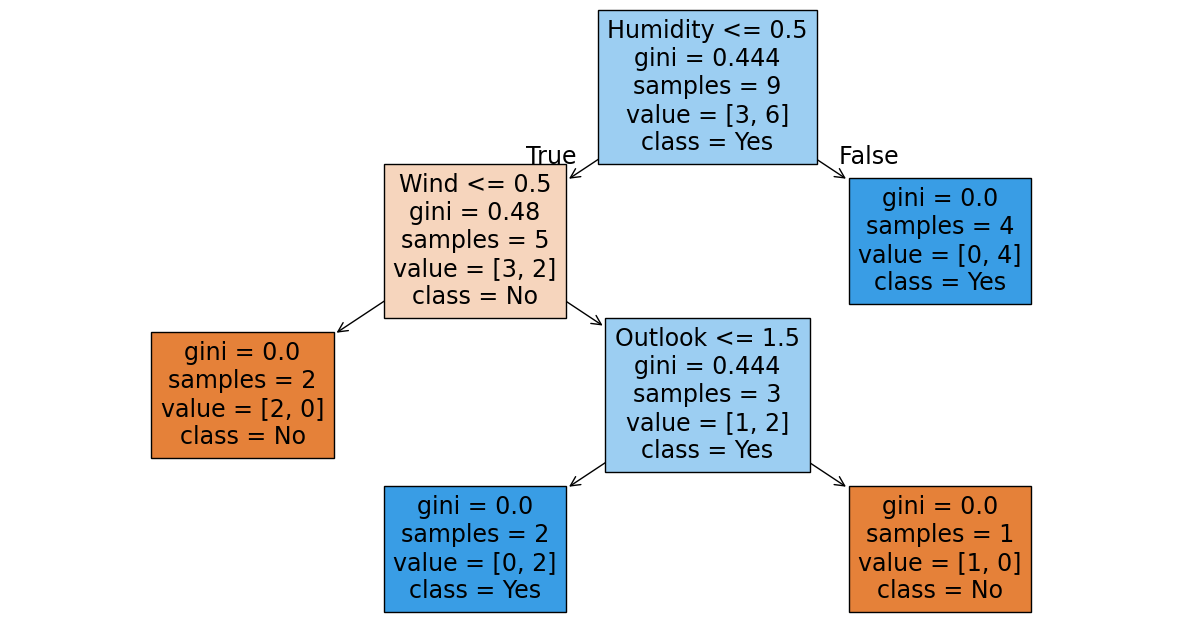

In [16]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(15,8))
plot_tree(
    dt,
    feature_names = X.columns,
    class_names=["No","Yes"],
    filled=True
)
plt.show()